In [35]:
from plotly.subplots import make_subplots

In [36]:
import plotly.express as px

In [37]:
import pandas as pd

In [38]:
import math

## ALL ServiceNow tickets by department

In [39]:
fh1 = '../data-display/tickets-per-dept-yearly.csv'
df = pd.read_csv(fh1)

In [40]:
cols = 3
rows = math.ceil(df['dept'].value_counts().shape[0] / cols)

In [41]:
fig = make_subplots(
    rows=rows, cols=cols, shared_yaxes='all',
    subplot_titles=(df['dept'].unique().tolist()))

In [42]:
r = 1
c = 1
for dept, ddf in df.groupby('dept'):
    if c > 3:
        c = 1
    fig.add_bar(
        y=ddf['tickets'].tolist(), x=ddf['year'].tolist(),
        row=r, col=c, name=dept)
    if c == 3:
        r += 1
    c += 1

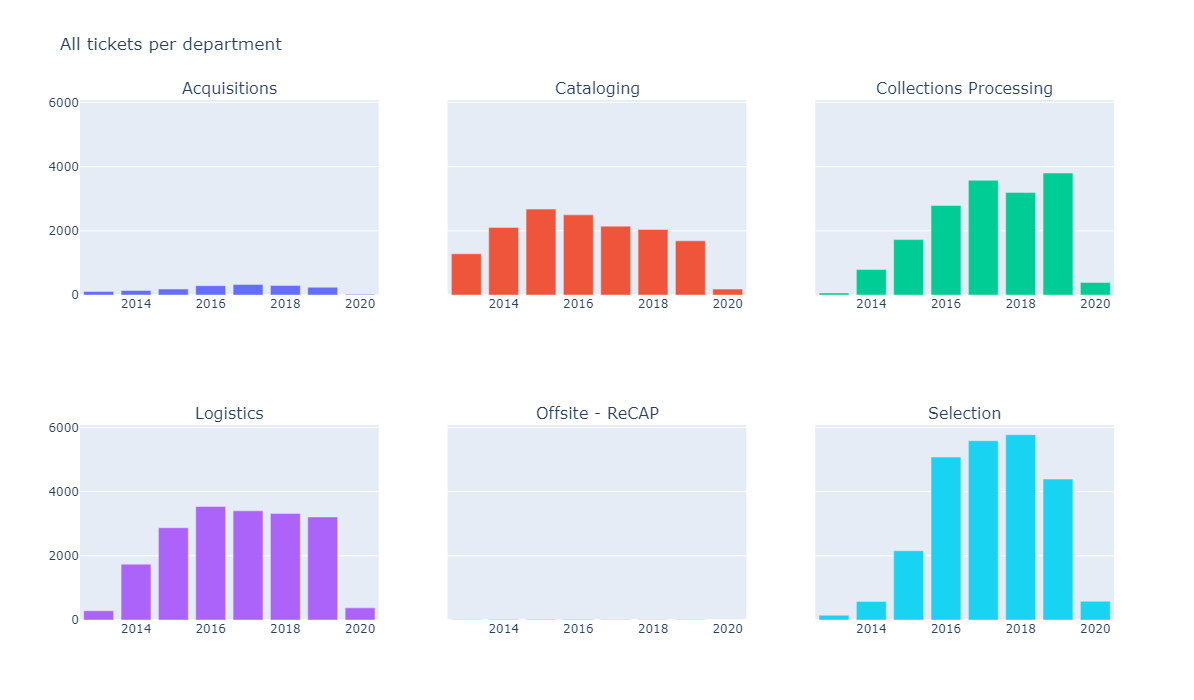

In [43]:
fig.update_layout(
    title_text='All tickets per department',
    showlegend=False,
    height=700, width=1200)
fig.show()

## Unresolved tickets by department

In [44]:
fh2 = '../data-display/unresolved-per-dept-yearly.csv'
df = pd.read_csv(fh2)

In [45]:
fig = make_subplots(
    rows=rows, cols=cols, shared_yaxes='all',
    subplot_titles=(df['dept'].unique().tolist()))

In [46]:
r = 1
c = 1
for dept, ddf in df.groupby('dept'):
    if c > 3:
        c = 1
    fig.add_bar(
        y=ddf['tickets'].tolist(), x=ddf['year'].tolist(),
        row=r, col=c, name=dept)
    if c == 3:
        r += 1
    c += 1

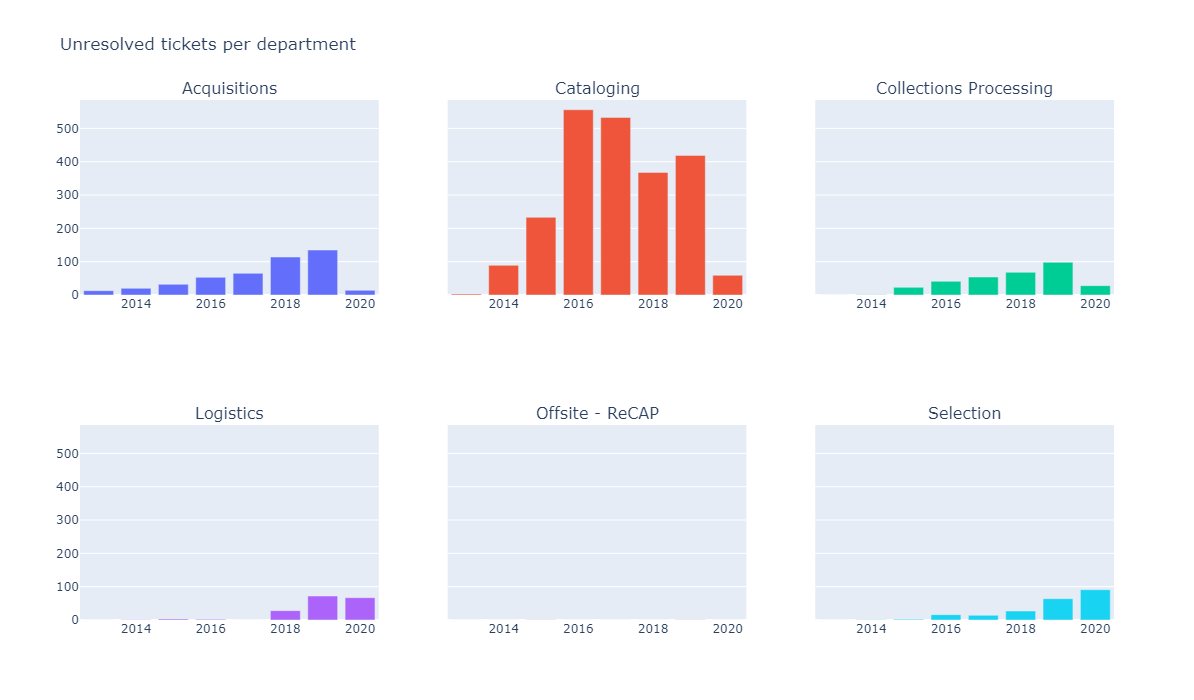

In [47]:
fig.update_layout(
    title_text='Unresolved tickets per department',
    showlegend=False,
    height=700, width=1200)
fig.show()

## CAT ServiceNow tickets by status

In [132]:
fh3 = '../data-display/cat-tickets-per-state-yearly.csv'
df = pd.read_csv(fh3)
df = df.sort_values('stack_order')

In [133]:
grouped_by_state = df.groupby('state')
frames = []
for state, gsdf1 in grouped_by_state:
    frames.append({'state': state, 'tickets': gsdf1['tickets'].sum()})
pie_status_df = pd.DataFrame(frames)

In [134]:
pie_status_df.head()

,state,tickets
0,Active,1265
1,Awaiting User Info,598
2,Awaiting Vendor,159
3,Closed,12031
4,New,384


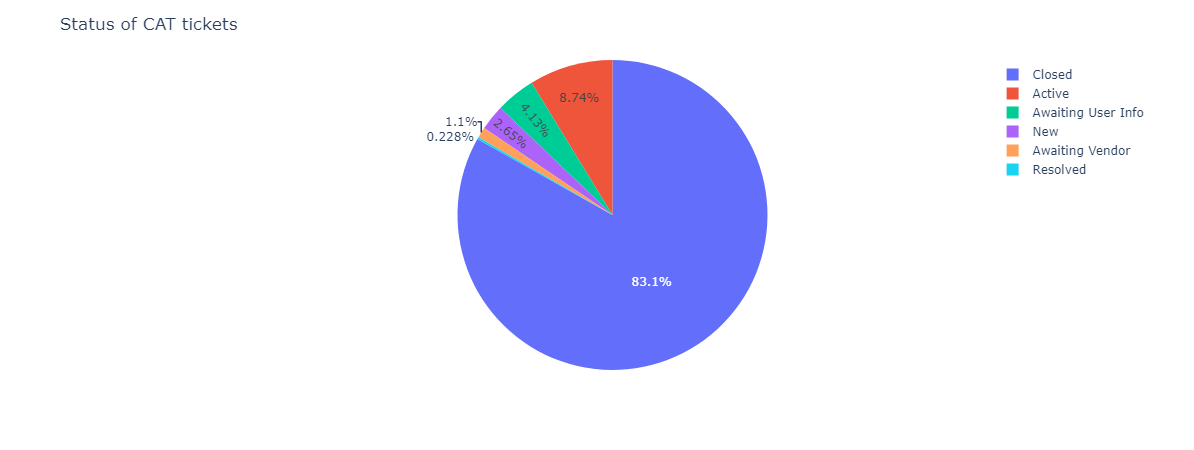

In [135]:
fig = px.pie(pie_status_df, values='tickets', names='state')
fig.update_layout(title_text='Status of CAT tickets')
fig.show()

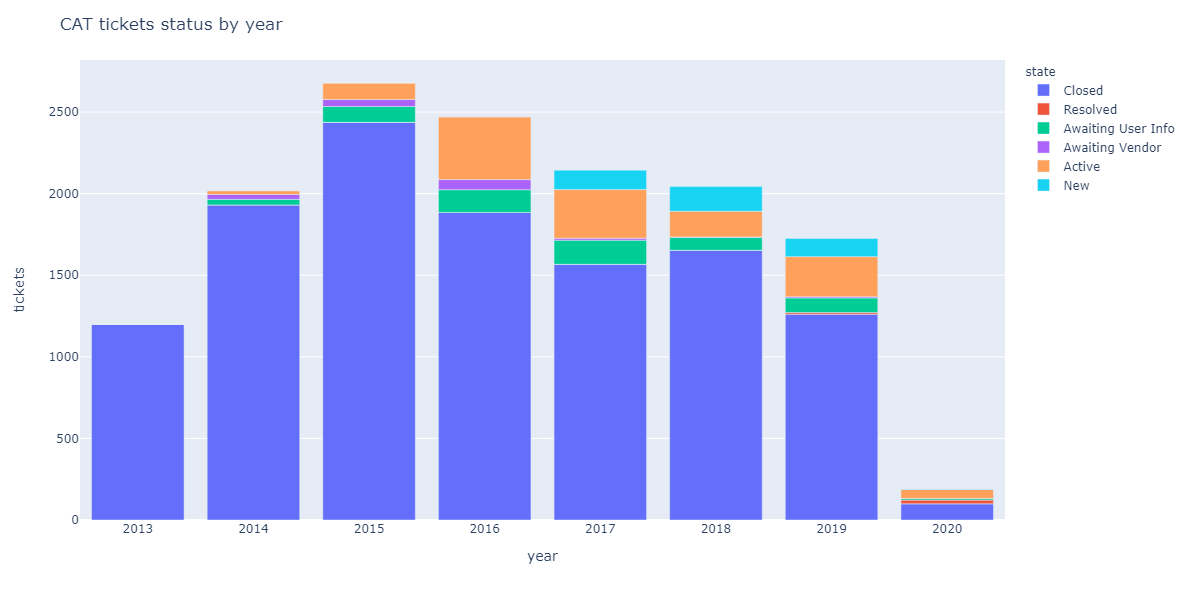

In [136]:
fig = px.bar(df, x='year', y='tickets', color='state')
fig.update_layout(title_text="CAT tickets status by year", height=600, width=1000)
fig.show()

## Misassigned CAT tickets

In [50]:
fh4 = '../data-display/cat-tickets-misassigned.csv'
df = pd.read_csv(fh4)

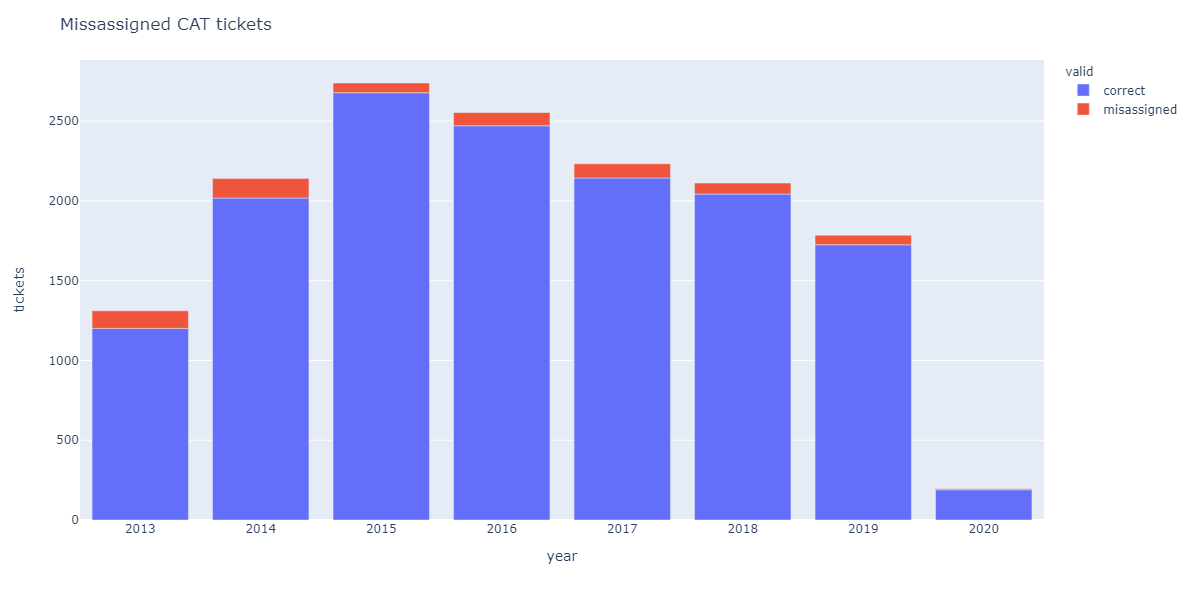

In [51]:
fig = px.bar(df, x='year', y='tickets', color='valid')
fig.update_layout(title_text="Missassigned CAT tickets", height=600, width=1000, showlegend=True)
fig.show()

In [127]:
df = pd.read_csv('../data-display/cat-misassigned-source.csv')
df.head()

,dept,tickets
0,BKOPS CPRC,319
1,BKOPS ACQ,158
2,BKOPS SEL,83
3,BKOPS RECAP,17
4,BKOPS ITIL,5


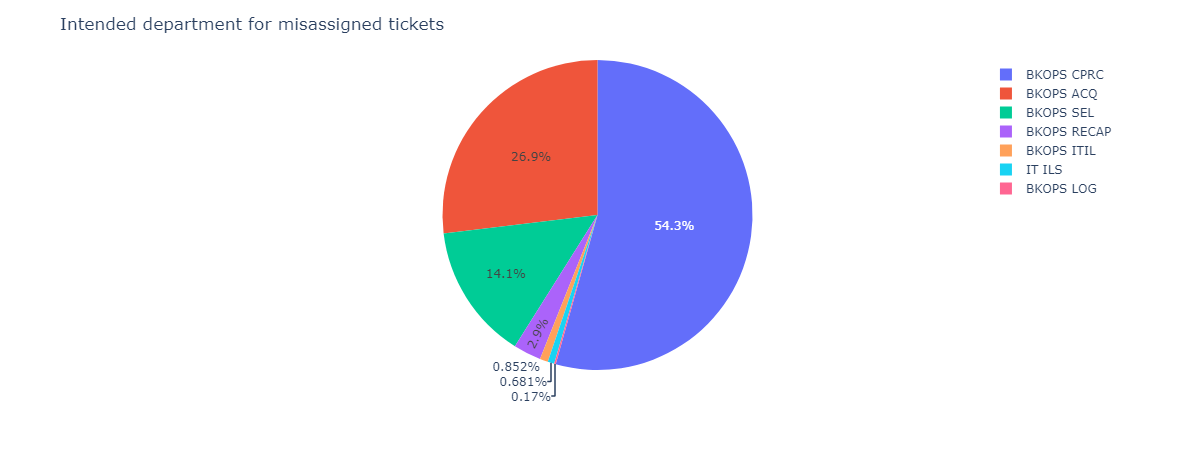

In [130]:
fig = px.pie(df, values='tickets', names='dept')
fig.update_layout(title_text='Intended department for misassigned tickets')
fig.show()

## Priority

In [139]:
df = pd.read_csv('../data-display/cat-tickets-priority.csv', header=0, names=['priority', 'tickets'])
df.head()

,priority,tickets
0,3 - Moderate,14444
1,1 - Critical,9
2,2 - High,5
3,4 - Low,5
4,5 - Planning,5


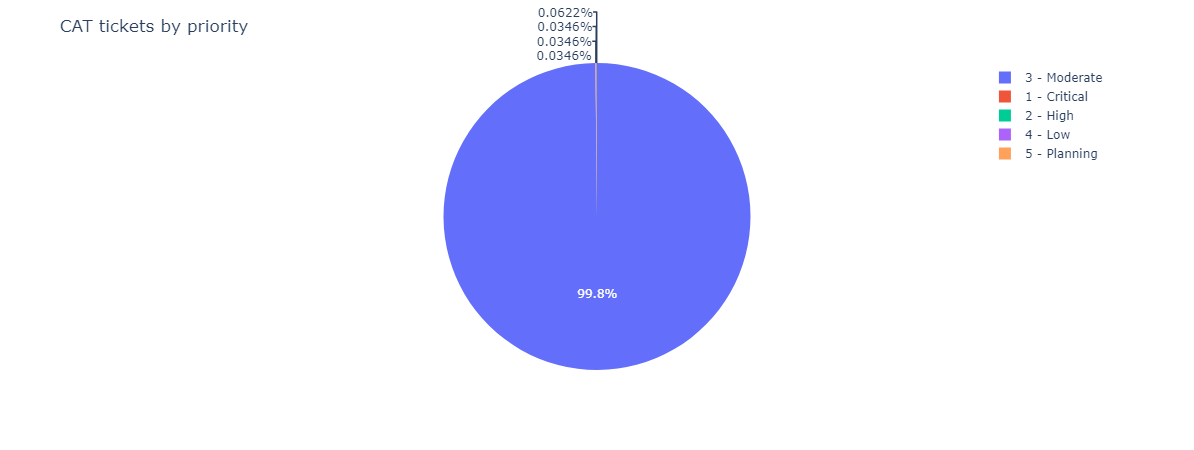

In [140]:
fig = px.pie(df, values='tickets', names='priority')
fig.update_layout(title_text='CAT tickets by priority')
fig.show()

## CAT tickets by day

In [52]:
fh5 = '../data-display/cat-tickets-by-day-described.csv'
df = pd.read_csv(fh5)
df.columns

Index(['weekday', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

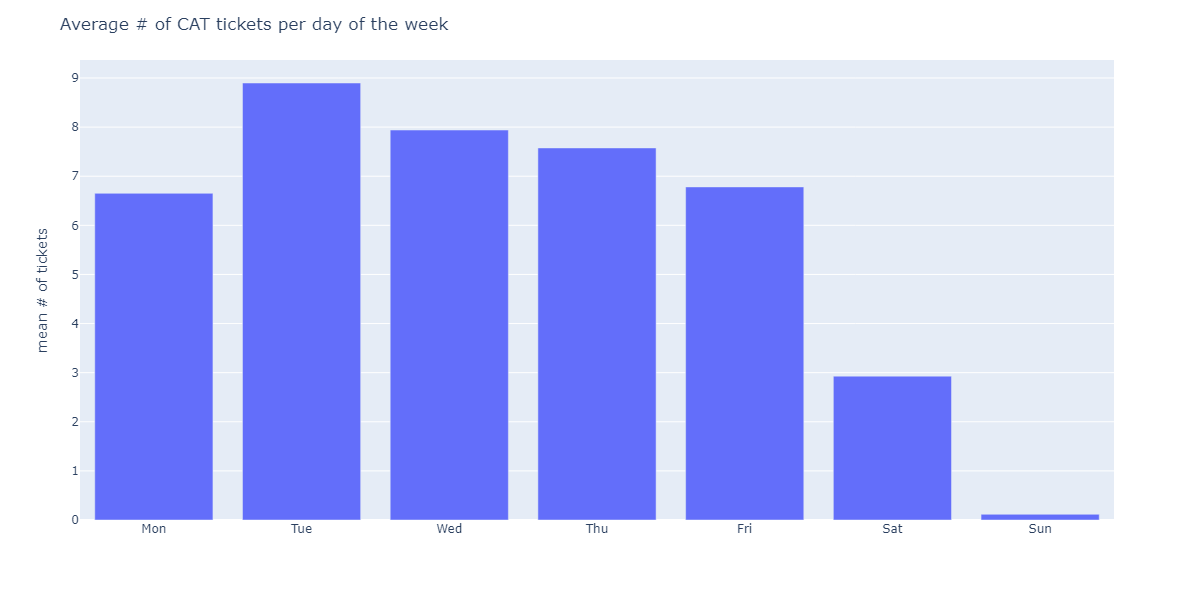

In [53]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig = px.bar(df, x=weekdays, y='mean')
fig.update_layout(
    title_text="Average # of CAT tickets per day of the week", height=600, width=1000,
    xaxis_title=None, yaxis_title='mean # of tickets')
fig.show()

In [54]:
fh6 = '../data-display/NYPL Research-tickets-by-date.csv'
fh7 = '../data-display/NYPL Circulating-tickets-by-date.csv'
fh8 = '../data-display/BPL Circulating-tickets-by-date.csv'

df_nr = pd.read_csv(fh6, index_col=0)
df_nb = pd.read_csv(fh7, index_col=0)
df_bb = pd.read_csv(fh8, index_col=0)

In [55]:
df_nr.describe()

,weekday,tickets
count,2476.000000,2476.000000
mean,3.000000,1.266155
std,1.999394,1.761497
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,1.000000
75%,5.000000,2.000000
max,6.000000,27.000000


In [56]:
df_nb.describe()

,weekday,tickets
count,2476.000000,2476.000000
mean,3.000000,2.334006
std,1.999394,2.731394
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,6.000000,30.000000


In [57]:
df_bb.describe()

,weekday,tickets
count,2476.000000,2476.000000
mean,3.000000,2.243942
std,1.999394,4.306568
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,1.000000
75%,5.000000,3.000000
max,6.000000,120.000000


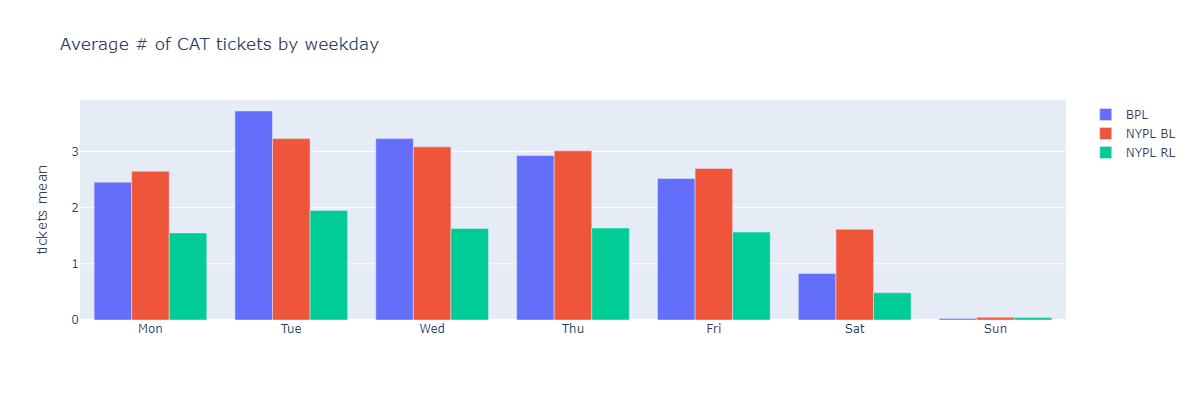

In [58]:
import plotly.graph_objects as go
fh9 = '../data-display/BPL Circulating-tickets-by-day-described.csv'
fh10 = '../data-display/NYPL Circulating-tickets-by-day-described.csv'
fh11 = '../data-display/NYPL Research-tickets-by-day-described.csv'
df9 = pd.read_csv(fh9, index_col=0)
df10 = pd.read_csv(fh10, index_col=0)
df11 = pd.read_csv(fh11, index_col=0)

fig = go.Figure(data=[
    go.Bar(name='BPL', x=weekdays, y=df9['mean']),
    go.Bar(name='NYPL BL', x=weekdays, y=df10['mean']),
    go.Bar(name='NYPL RL', x=weekdays, y=df11['mean'])
])
fig.update_layout(title_text='Average # of CAT tickets by weekday', yaxis_title='tickets mean', height=400, width=1000)
fig.show()

In [59]:
db = pd.read_csv('../data-display/BPL Circulating-tickets-by-date.csv', index_col=0)
db.describe()

,weekday,tickets
count,2476.000000,2476.000000
mean,3.000000,2.243942
std,1.999394,4.306568
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,1.000000
75%,5.000000,3.000000
max,6.000000,120.000000


In [60]:
db.idxmax()

weekday    2013-05-12
tickets    2014-08-19
dtype: object

In [61]:
dnb = pd.read_csv('../data-display/NYPL Circulating-tickets-by-date.csv', index_col=0)
dnb.describe()

,weekday,tickets
count,2476.000000,2476.000000
mean,3.000000,2.334006
std,1.999394,2.731394
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,6.000000,30.000000


In [62]:
dnb.idxmax()

weekday    2013-05-12
tickets    2016-01-26
dtype: object

In [63]:
dnr = pd.read_csv('../data-display/NYPL Research-tickets-by-date.csv', index_col=0)
dnr.describe()

,weekday,tickets
count,2476.000000,2476.000000
mean,3.000000,1.266155
std,1.999394,1.761497
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,1.000000
75%,5.000000,2.000000
max,6.000000,27.000000


In [64]:
dnr.idxmax()

weekday    2013-05-12
tickets    2017-05-25
dtype: object

In [65]:
# Average # of resolved tickets per weekday
rdf = pd.read_csv('../data-display/cat-resolved-by-day-described.csv', index_col=0)
rdf.head(7)

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
0,353.0,6.031161,5.927751,0.0,2.00,5.0,8.0,44.0
1,354.0,6.875706,6.444474,0.0,3.00,5.0,9.0,43.0
2,354.0,7.124294,9.313631,0.0,3.00,5.0,9.0,134.0
3,354.0,6.677966,6.957436,0.0,2.25,5.0,8.0,58.0
4,354.0,6.624294,5.691560,0.0,3.00,6.0,9.0,37.0
5,354.0,0.293785,1.053049,0.0,0.00,0.0,0.0,9.0
6,353.0,0.300283,0.819108,0.0,0.00,0.0,0.0,6.0


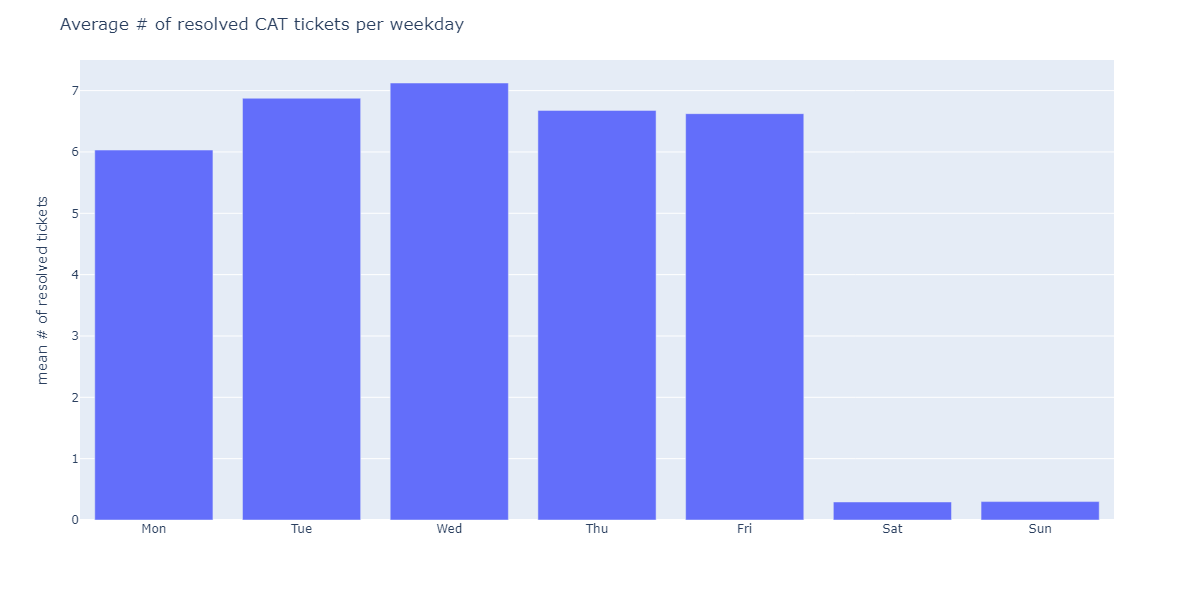

In [66]:
fig = px.bar(rdf, x=weekdays, y='mean')
fig.update_layout(
    title_text="Average # of resolved CAT tickets per weekday", height=600, width=1000,
    xaxis_title=None, yaxis_title='mean # of resolved tickets')
fig.show()

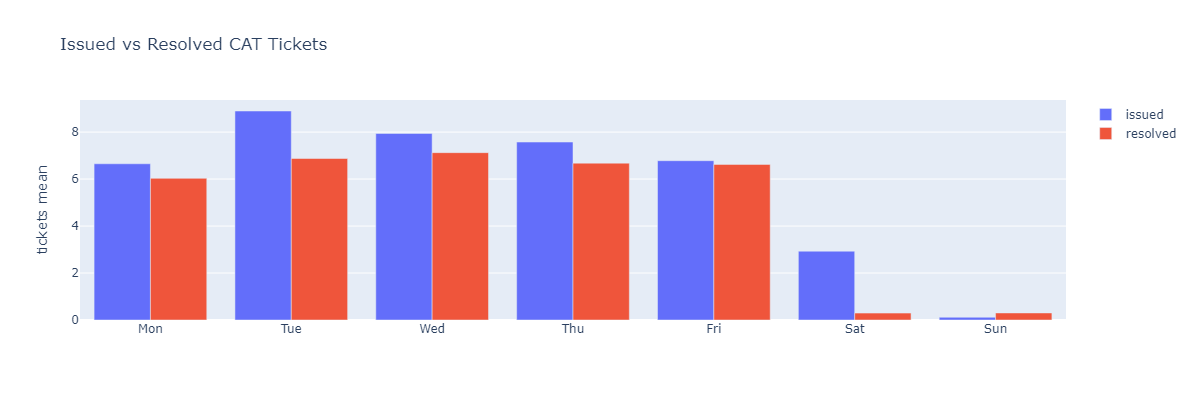

In [67]:
# issued vs resolved
fig = go.Figure(data=[
    go.Bar(name='issued', x=weekdays, y=df['mean']),
    go.Bar(name='resolved', x=weekdays, y=rdf['mean'])
])
fig.update_layout(title_text='Issued vs Resolved CAT Tickets', yaxis_title='tickets mean', height=400, width=1000)
fig.show()

In [80]:
# BPL & NYPL issued vs resolved
df12_r = pd.read_csv('../data-display/BPL Circulating-resolved-by-day-described.csv')
df12_o = pd.read_csv('../data-display/BPL Circulating-tickets-by-day-described.csv')
df13_r = pd.read_csv('../data-display/NYPL Circulating-resolved-by-day-described.csv')
df13_o = pd.read_csv('../data-display/NYPL Circulating-tickets-by-day-described.csv')
df14_r = pd.read_csv('../data-display/NYPL Research-resolved-by-day-described.csv')
df14_o = pd.read_csv('../data-display/NYPL Research-tickets-by-day-described.csv')

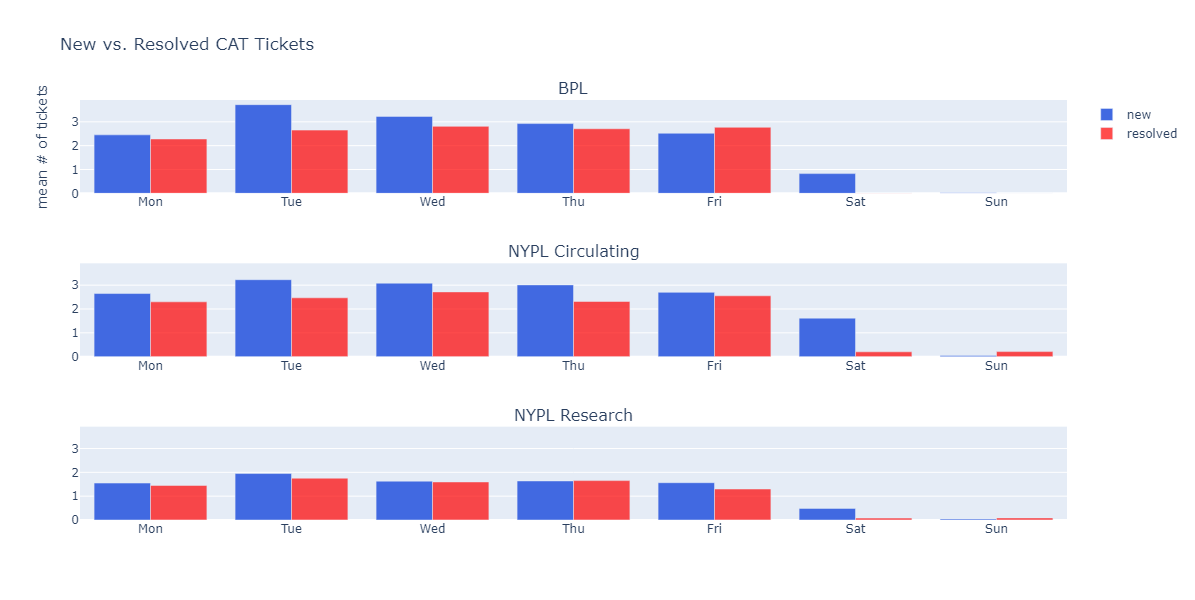

In [101]:
fig = make_subplots(
    rows=3, cols=1, shared_yaxes='all',
    subplot_titles=(['BPL', 'NYPL Circulating', 'NYPL Research']))
    
fig.add_bar(
    y=df12_o['mean'], x=weekdays,
    row=1, col=1, name='new',
    marker=dict(color='RoyalBlue'))
fig.add_bar(
    y=df12_r['mean'], x=weekdays,
    row=1, col=1, name='resolved',
    marker=dict(color='rgba(255, 0, 0, 0.7)'))

fig.add_bar(
    y=df13_o['mean'], x=weekdays,
    row=2, col=1, name='new',
    marker=dict(color='RoyalBlue'),
    showlegend=False)
fig.add_bar(
    y=df13_r['mean'], x=weekdays,
    row=2, col=1, name='resolved',
    marker=dict(color='rgba(255, 0, 0, 0.7)'),
    showlegend=False)

fig.add_bar(
    y=df14_o['mean'], x=weekdays,
    row=3, col=1, name='new',
    marker=dict(color='RoyalBlue'),
    showlegend=False)
fig.add_bar(
    y=df14_r['mean'], x=weekdays,
    row=3, col=1, name='resolved',
    marker=dict(color='rgba(255, 0, 0, 0.7)'),
    showlegend=False)

fig.update_layout(title_text='New vs. Resolved CAT Tickets', yaxis_title='mean # of tickets', height=600, width=1000)
fig.show()